<a href="https://colab.research.google.com/github/Dimas263/Data-Visualisation-And-Time-Series/blob/main/Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/color/48/undefined/1-circle--v1.png"/>**persiapan library python**

In [ ]:
import pandas as pd                   
import numpy as np                    
from math import sqrt                 
from pandas import Series             
                                      

from matplotlib import pyplot         
from matplotlib.pyplot import figure  
import matplotlib.pyplot as plt       
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') 
from matplotlib.pylab import rcParams 
                                      

import statsmodels.api as sm          
import statsmodels.tsa.api as smt     
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller  
from statsmodels.tsa.arima_model import ARIMA  
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       
warnings.filterwarnings('ignore')     
import sys                            
import itertools                       
                                      
import seaborn as sns                 
%matplotlib inline   

# <img src="https://img.icons8.com/color/48/undefined/2-circle--v1.png"/>**Persiapan Dataset**

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghubungkan mesin ke lokasi penyimpanan dataset di google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menampilkan dataset join order**

In [ ]:
df_sales = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sales/join_order.xlsx')

In [ ]:
df_sales

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,gender,num_of_item
0,142678.0,98658.0,79128.0,28951.0,385231.0,Returned,2021-11-02,2021-11-02,2021-11-07,2021-11-08,3.000000e+01,M,2.0
1,152447.0,105326.0,84559.0,28951.0,411732.0,Returned,2021-10-12,2021-10-13,2021-10-14,2021-10-16,3.000000e+01,M,3.0
2,39237.0,27222.0,21978.0,28557.0,105905.0,Returned,2021-09-29,2021-10-01,2021-10-03,2021-10-05,3.250000e+02,M,1.0
3,43331.0,29987.0,24222.0,28679.0,116984.0,Returned,2021-01-24,2021-01-27,2021-01-28,2021-01-29,3.500000e+01,M,1.0
4,101499.0,70266.0,56436.0,15419.0,274105.0,Returned,2022-05-11,2022-05-13,2022-05-15,2022-05-15,3.500000e+01,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17747,36550.0,25342.0,20487.0,184.0,98689.0,Returned,2022-05-30,2022-05-30,2022-06-02,2022-06-03,8.820000e+15,F,4.0
17748,83752.0,58020.0,46700.0,417.0,226288.0,Returned,2021-07-30,2021-07-31,2021-08-01,2021-08-03,8.820000e+15,F,4.0
17749,84922.0,58842.0,47374.0,184.0,229443.0,Returned,2022-03-23,2022-03-23,2022-03-28,2022-03-28,8.820000e+15,F,3.0
17750,98934.0,68545.0,55023.0,417.0,267194.0,Returned,2020-12-29,2020-12-31,2021-01-02,2021-01-05,8.820000e+15,F,3.0


**dataset join order mempunyai 17752 baris dan 13 kolom**

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **mengubah kolom waktu order sebagai kolom utama atau index**

In [ ]:
df_sales=df_sales.set_index(['delivered_at'])
df_sales.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,returned_at,sale_price,gender,num_of_item
delivered_at,,,,,,,,,,,,
2021-11-07,142678.0,98658.0,79128.0,28951.0,385231.0,Returned,2021-11-02,2021-11-02,2021-11-08,30.0,M,2.0
2021-10-14,152447.0,105326.0,84559.0,28951.0,411732.0,Returned,2021-10-12,2021-10-13,2021-10-16,30.0,M,3.0
2021-10-03,39237.0,27222.0,21978.0,28557.0,105905.0,Returned,2021-09-29,2021-10-01,2021-10-05,325.0,M,1.0
2021-01-28,43331.0,29987.0,24222.0,28679.0,116984.0,Returned,2021-01-24,2021-01-27,2021-01-29,35.0,M,1.0
2022-05-15,101499.0,70266.0,56436.0,15419.0,274105.0,Returned,2022-05-11,2022-05-13,2022-05-15,35.0,F,1.0


## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung summary dataset join order**

In [ ]:
df_sales.describe()

# Pembulatan decimal 2 angka di belakang koma
df_sales.describe().round(2)

,id,order_id,user_id,product_id,inventory_item_id,sale_price,num_of_item
count,17752.00,17752.00,17752.00,17752.00,17752.00,1.775200e+04,17752.00
mean,90644.24,62675.72,50385.72,15151.78,244774.49,8.137358e+15,1.90
std,52510.97,36269.66,29062.41,8435.64,141798.94,1.296444e+16,1.05
min,17.00,9.00,6.00,1.00,45.00,3.000000e+01,1.00
25%,44260.00,30647.50,24749.75,7755.75,119485.75,5.500000e+02,1.00
50%,91386.50,63307.00,50879.00,15801.50,246820.50,4.000000e+14,2.00
75%,136279.75,94271.75,75665.75,22428.50,367954.50,1.270000e+16,2.00
max,180504.00,124508.00,99997.00,29120.00,487384.00,7.160000e+16,4.00


# <img src="https://img.icons8.com/color/48/undefined/2-circle--v1.png"/>**Analysis dan Visualisasi**

## **Time Series**

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung jumlah penjualan perminggu (week)**

In [ ]:
sales=df_sales.resample('w').sum()

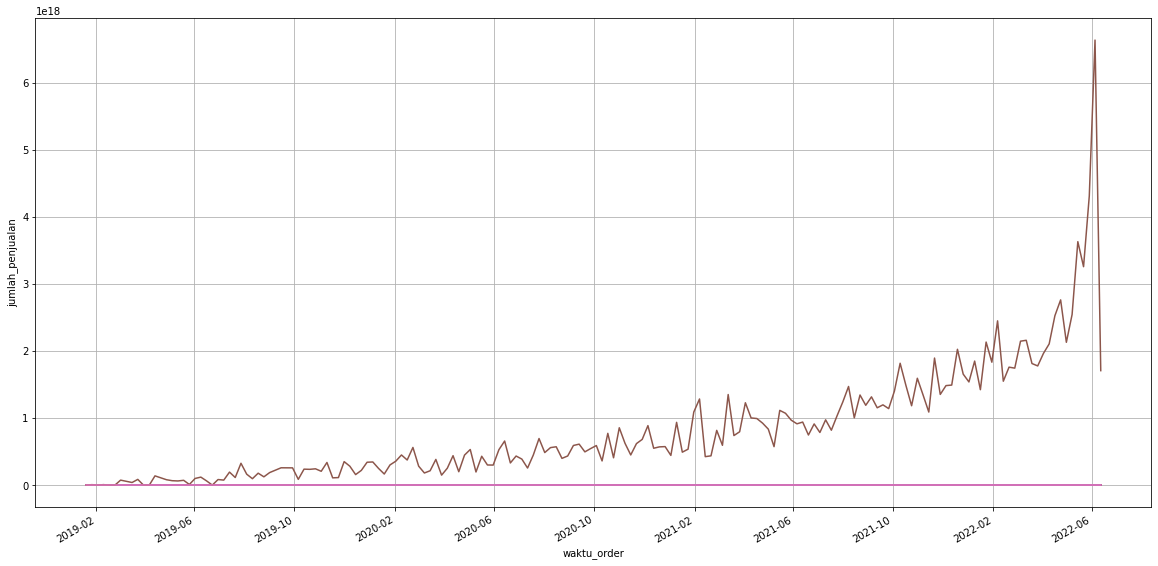

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("waktu_order")
plty.ylabel("jumlah_penjualan")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(sales)
fig.autofmt_xdate()
plty.grid()
plty.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung jumlah penjualan akhir bulan (MonthEnd)**

In [ ]:
sales2=df_sales.resample('M').sum()

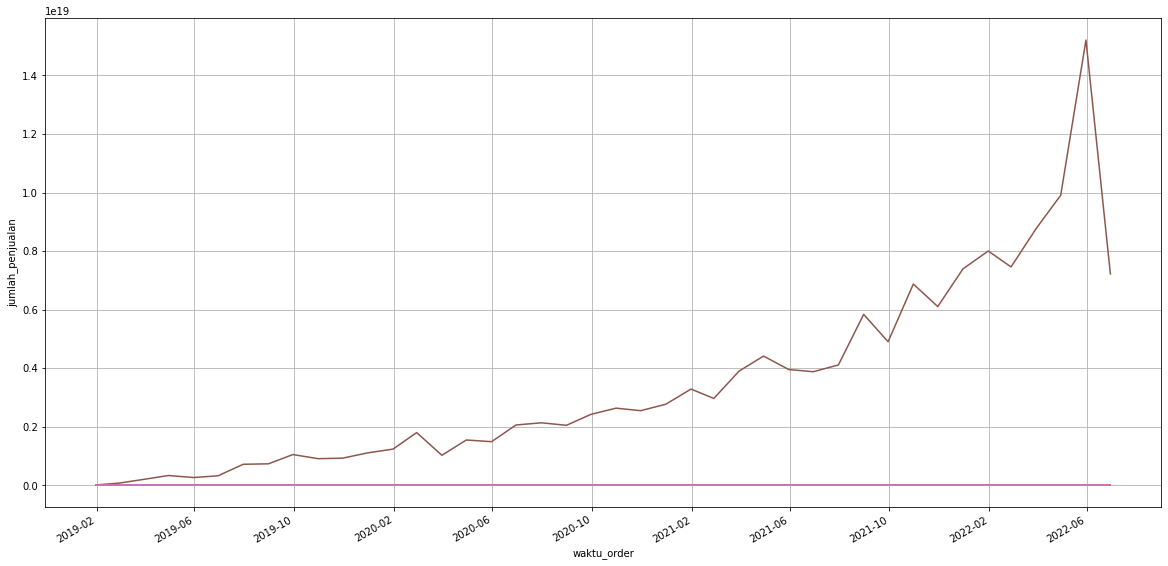

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("waktu_order")
plty.ylabel("jumlah_penjualan")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(sales2)
fig.autofmt_xdate()
plty.grid()
plty.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung jumlah penjualan perhari (daily)**

In [ ]:
sales3=df_sales.resample('D').sum()

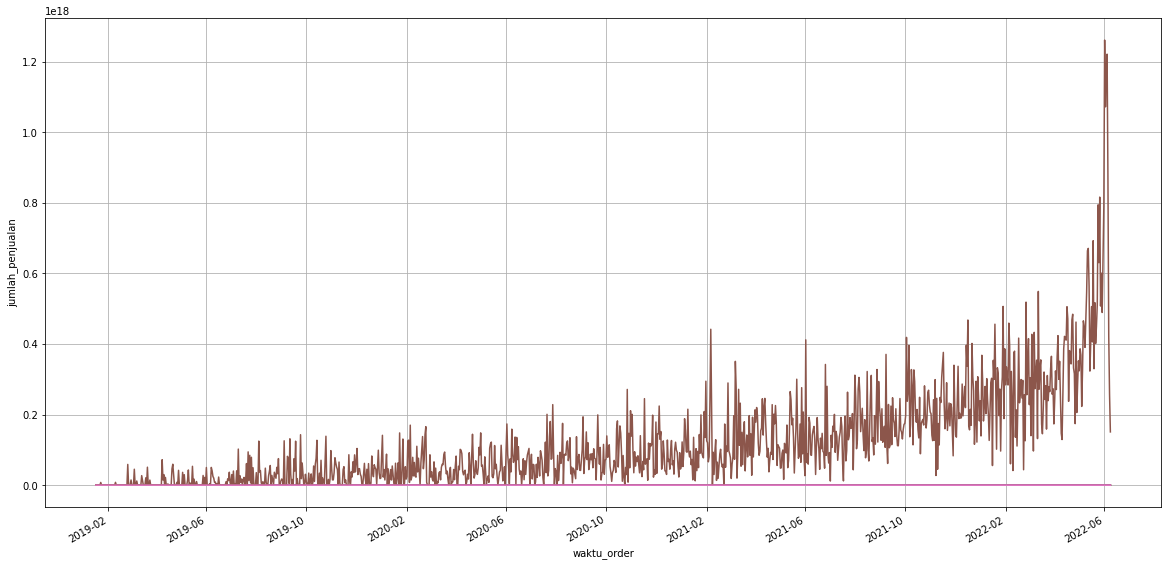

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("waktu_order")
plty.ylabel("jumlah_penjualan")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(sales3)
fig.autofmt_xdate()
plty.grid()
plty.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung jumlah penjualan pertahun (year)**

In [ ]:
sales4=df_sales.resample('Y').sum()

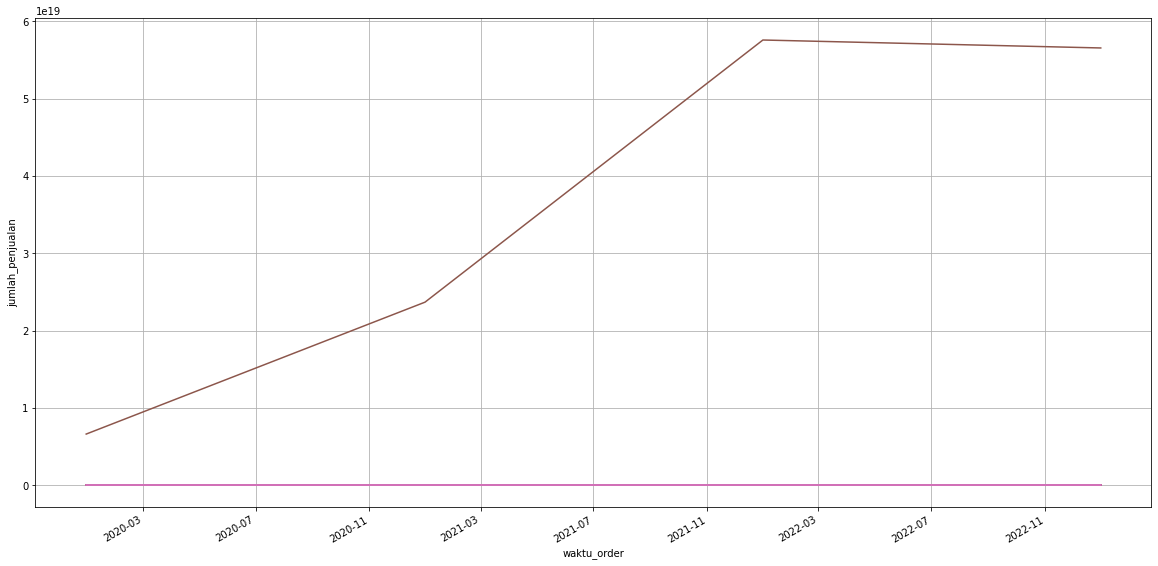

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("waktu_order")
plty.ylabel("jumlah_penjualan")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(sales4)
fig.autofmt_xdate()
plty.grid()
plty.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung created at penjualan keseluruhan**

In [ ]:
import seaborn as sns

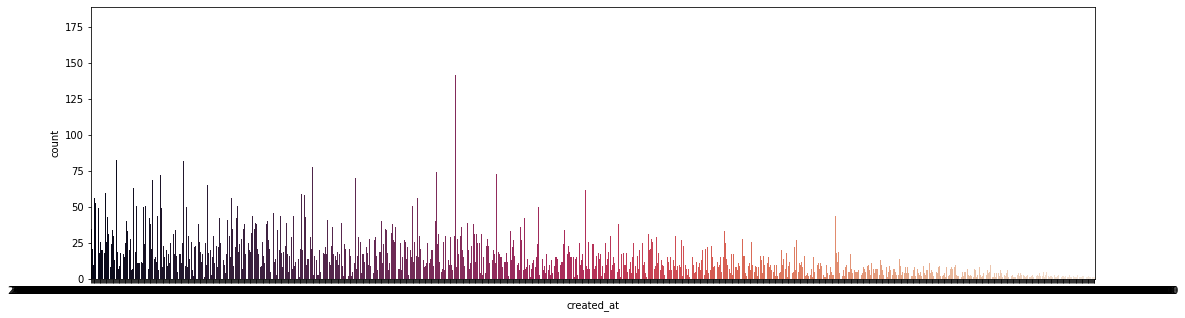

In [ ]:
df_sales['created_at'] = pd.to_datetime(df_sales['created_at'])

plt.figure(figsize=(18,5))
sns.countplot(x = df_sales['created_at'], palette="rocket", linewidth = 1)
plt.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung shipped_at penjualan keseluruhan**

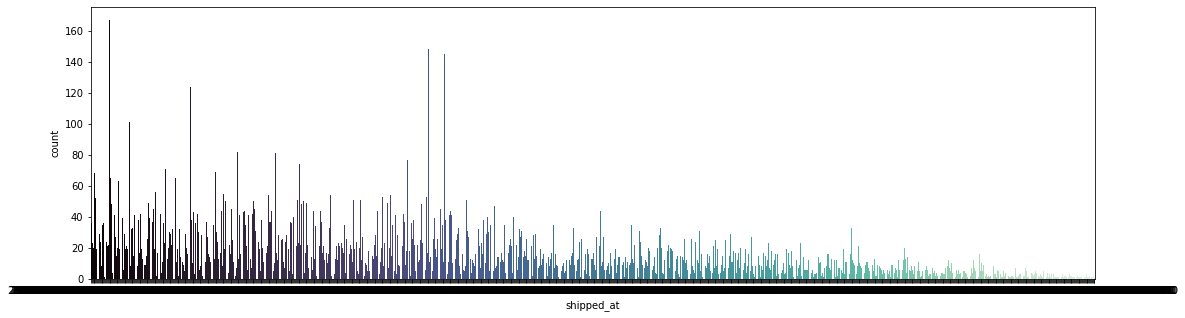

In [ ]:
df_sales['shipped_at'] = pd.to_datetime(df_sales['shipped_at'])

plt.figure(figsize=(18,5))
sns.countplot(x = df_sales['shipped_at'], palette="mako", linewidth = 1)
plt.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung delivered_at penjualan keseluruhan**

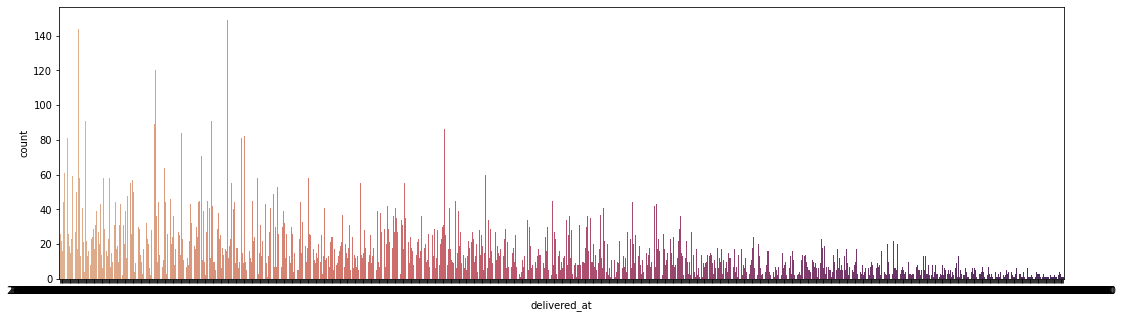

In [ ]:
df_sales.index = pd.to_datetime(df_sales.index)

plt.figure(figsize=(18,5))
sns.countplot(x = df_sales.index, palette="flare", linewidth = 1)
plt.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung returned_at penjualan keseluruhan**

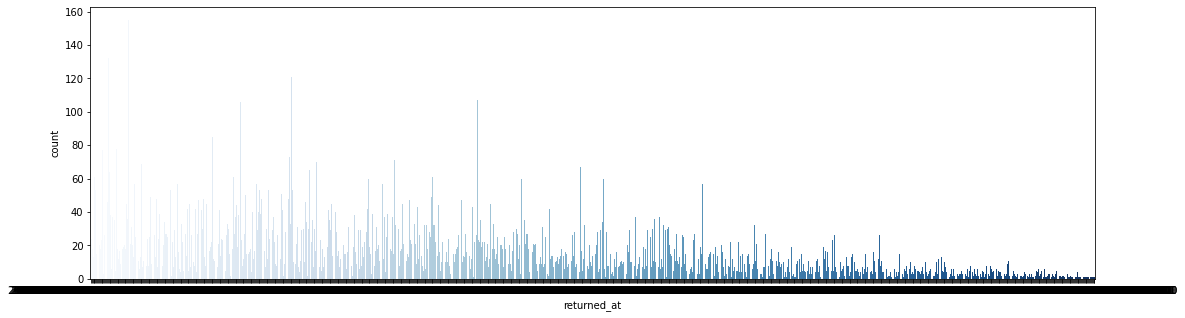

In [ ]:
df_sales['returned_at'] = pd.to_datetime(df_sales['returned_at'])

plt.figure(figsize=(18,5))
sns.countplot(x = df_sales['returned_at'], palette="Blues", linewidth = 1)
plt.show()

## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **menghitung gender dan number item penjualan keseluruhan**

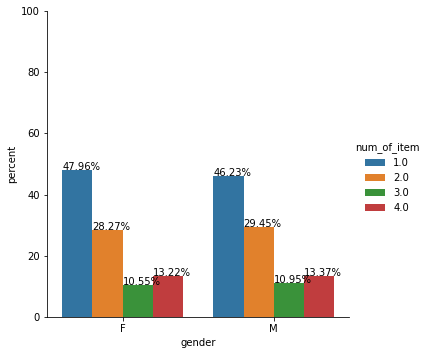

In [ ]:
x,y = 'gender', 'num_of_item'

df1 = df_sales.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# <img src="https://img.icons8.com/color/48/undefined/3-circle--v1.png"/>**Data Spliting**
# untuk memisahkan `string` menjadi `sub string`

In [ ]:
import re
import json
import pandas as pd
from pprint import pprint

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sales/join_order.xlsx')

texts = []
for id, order_id, user_id, product_id, inventory_item_id, status, created_at, shipped_at, delivered_at, returned_at, sale_price, gender, num_of_item in zip(
    df['id'].tolist(), df['order_id'].tolist(), df['user_id'].tolist(), df['product_id'].tolist(), df['inventory_item_id'].tolist(), 
    df['status'].tolist(), df['created_at'].tolist(), df['shipped_at'].tolist(), df['delivered_at'].tolist(), df['returned_at'].tolist(), 
    df['sale_price'].tolist(), df['gender'].tolist(), df['num_of_item'].tolist()
    ):
    created_at = pd.to_datetime(created_at).date()
    shipped_at = pd.to_datetime(shipped_at).date()
    delivered_at = pd.to_datetime(delivered_at).date()
    returned_at = pd.to_datetime(returned_at).date()
    texts.append([id, order_id, user_id, product_id, inventory_item_id, status, created_at, shipped_at, delivered_at, returned_at, sale_price, gender, num_of_item])

df = pd.DataFrame(texts, columns=['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id', 'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at', 'sale_price', 'gender', 'num_of_item'])


## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **Train Data**

In [ ]:
! pip install xlsxwriter

import xlsxwriter

train_df = df.sample(frac=0.8, random_state=1)

writer = pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/sales/train.xlsx', engine='xlsxwriter')
train_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/sales/train.xlsx")
train

,Unnamed: 0,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,gender,num_of_item
0,12492,31660,21949,17788,27121,85413,Returned,2020-09-28,2020-09-25,2020-09-30,2020-09-30,600000000000000,M,2
1,17335,41973,29068,23456,26589,113276,Returned,2021-10-09,2021-10-11,2021-10-13,2021-10-14,7500000000000000,M,3
2,5358,65426,45219,36473,22173,176718,Returned,2021-12-09,2021-12-08,2021-12-08,2021-12-11,1395,M,4
3,16007,31184,21609,17522,8501,84139,Returned,2021-12-06,2021-12-07,2021-12-12,2021-12-13,18900000000000000,F,1
4,17319,157163,108588,87215,15906,424487,Returned,2022-05-07,2022-05-07,2022-05-08,2022-05-09,9800000000000000,F,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14197,9096,93544,64807,52054,28191,252675,Returned,2020-07-07,2020-07-10,2020-07-10,2020-07-11,13000000000000000,M,1
14198,15486,148953,102917,82627,6298,402267,Returned,2020-12-11,2020-12-12,2020-12-16,2020-12-18,11900000000000000,F,1
14199,1670,132080,91333,73259,536,356584,Returned,2022-03-30,2022-03-28,2022-03-29,2022-04-01,250,F,2
14200,9917,52956,36603,29562,20049,143006,Returned,2022-06-03,2022-06-02,2022-06-05,2022-06-08,59900000000000000,M,2


## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **Test Data**

In [ ]:
test_df = df.drop(train_df.index)

writer = pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/sales/test.xlsx', engine='xlsxwriter')
test_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [ ]:
test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/sales/test.xlsx")
test

,Unnamed: 0,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,gender,num_of_item
0,9,4805,3295,2662,28370,13038,Returned,2022-05-08,2022-05-11,2022-05-13,2022-05-15,45,M,1
1,14,177017,122150,98116,9002,477975,Returned,2022-04-28,2022-04-30,2022-05-02,2022-05-04,50,F,1
2,15,74,51,33,9380,198,Returned,2019-09-02,2019-09-03,2019-09-03,2019-09-04,55,F,1
3,18,67362,46557,37544,13840,181949,Returned,2022-01-09,2022-01-12,2022-01-16,2022-01-17,60,F,1
4,20,89666,62129,49973,15667,242242,Returned,2022-02-05,2022-02-06,2022-02-07,2022-02-07,60,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,17723,145163,100321,80484,23505,391953,Returned,2022-04-28,2022-04-27,2022-04-28,2022-04-30,2360000000000000,M,4
3546,17728,51234,35442,28673,201,138334,Returned,2022-05-28,2022-05-24,2022-05-25,2022-05-28,1290000000000000,F,3
3547,17734,46432,32125,25964,28895,125412,Returned,2021-09-15,2021-09-15,2021-09-17,2021-09-20,2390000000000000,M,3
3548,17739,169319,116946,93981,3429,457289,Returned,2020-09-19,2020-09-20,2020-09-24,2020-09-26,2890000000000000,F,1


## <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **Validation Data**

In [ ]:
val_df = test_df.sample(frac=0.4, random_state=1024)

writer = pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/sales/val.xlsx', engine='xlsxwriter')
val_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [ ]:
val = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/sales/val.xlsx")
val

,Unnamed: 0,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,gender,num_of_item
0,15383,16693,11506,9402,19675,45108,Returned,2021-02-15,2021-02-16,2021-02-19,2021-02-22,2940000000000000,M,2
1,11970,2115,1464,1158,2020,5747,Returned,2021-10-08,2021-10-10,2021-10-12,2021-10-14,400000000000000,F,1
2,14384,6963,4782,3892,3028,18872,Returned,2022-02-27,2022-02-26,2022-02-26,2022-03-01,30000000000000000,F,2
3,10856,95499,66151,53127,13821,257950,Returned,2021-03-24,2021-03-25,2021-03-28,2021-03-30,831000000000000,F,3
4,7695,137445,95072,76289,27161,371083,Returned,2020-12-23,2020-12-26,2020-12-28,2020-12-28,950,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,9887,95238,65964,52980,16175,257249,Returned,2021-11-22,2021-11-22,2021-11-22,2021-11-22,32000000000000000,M,2
1416,5909,96098,66561,53446,23188,259545,Returned,2021-01-12,2021-01-11,2021-01-15,2021-01-17,450,M,2
1417,10777,41410,28685,23155,11038,111763,Returned,2019-11-01,2019-11-04,2019-11-05,2019-11-07,10700000000000000,F,2
1418,11401,170597,117821,94709,16771,460706,Returned,2019-10-26,2019-10-29,2019-10-30,2019-11-02,350000000000000,M,1


# <img src="https://img.icons8.com/parakeet/24/undefined/experimental-arrow-parakeet.png"/> **summary**
# Original Dataset Join Order `17752 rows × 13 columns`
# Train Data 80% dari join order, berjumlah `14202 rows × 14 columns`
# Test Data 20% dari join order, berjumlah `3550 rows × 14 columns`
# Validation Data 40% dari test data , berjumlah `1420 rows × 14 columns`

# <img src="https://img.icons8.com/color/48/undefined/4-circle--v1.png"/>**Modelling dan Calculate Metrics**